In [3]:
%load_ext autoreload
%autoreload 2

In [15]:
import sys
#import behavior_benchmarks as bb
sys.path.append('/home/jupyter')
import os
import glob
import yaml
import numpy as np
from matplotlib import pyplot as plt

Training model
Initialization 0
  Iteration 10	 time lapse 9.23044s	 ll change 0.05313
  Iteration 20	 time lapse 7.77342s	 ll change 0.00760
  Iteration 30	 time lapse 7.84075s	 ll change 0.00524
  Iteration 40	 time lapse 7.84530s	 ll change 0.00997
  Iteration 50	 time lapse 7.83416s	 ll change 0.00213
Initialization converged: True	 time lapse 43.64846s	 ll -8.76617
Generating predictions based on trained model


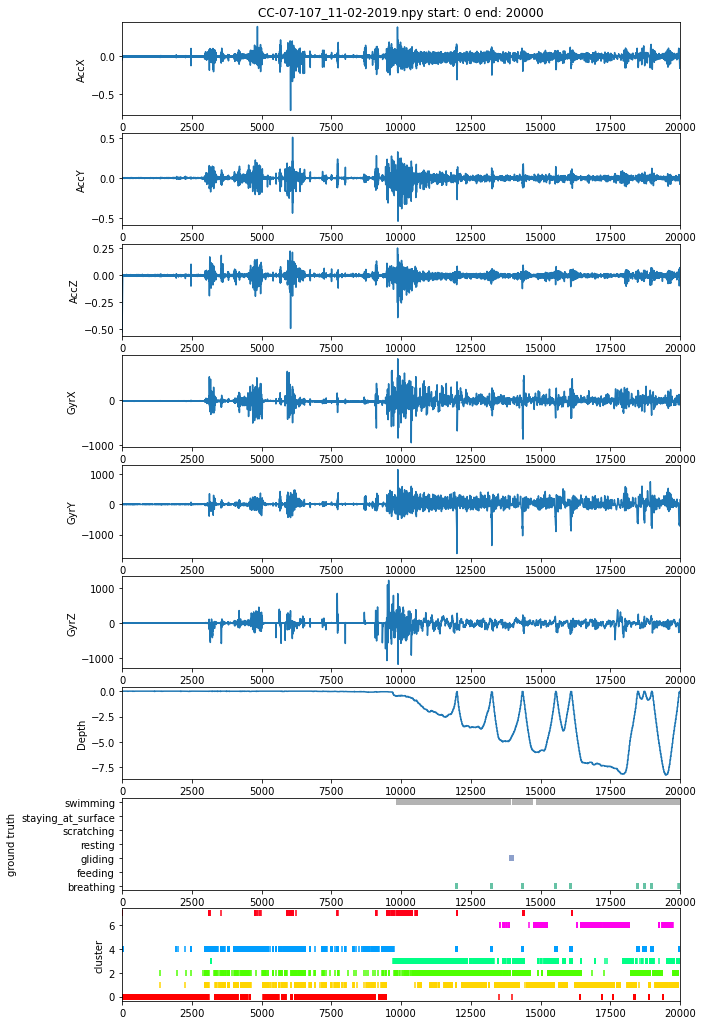

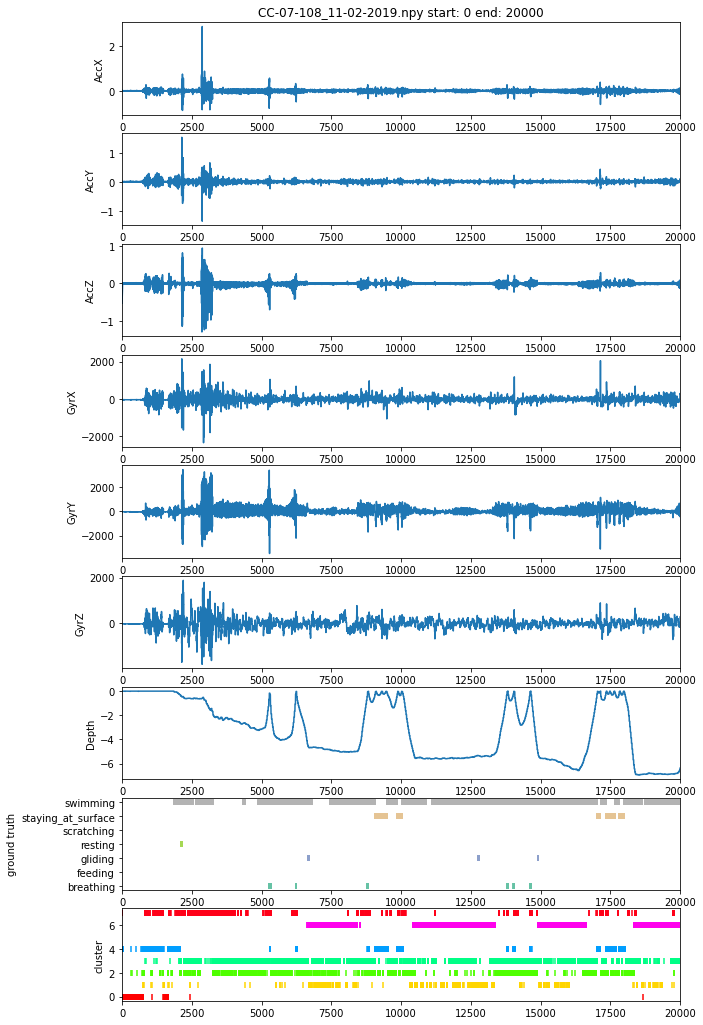

In [47]:
%run train_model.py

In [26]:
dl.metadata

{'clip_column_names': ['AccX',
  'AccY',
  'AccZ',
  'GyrX',
  'GyrY',
  'GyrZ',
  'Depth',
  'individual_id',
  'label'],
 'clip_id_to_individual_id': {'CC-07-107_11-02-2019': 0,
  'CC-07-108_11-02-2019': 1,
  'CC-07-115_13-05-2019': 2,
  'CC-07-115_14-05-2019': 3,
  'CC-07-47_14-02-2018': 4,
  'CC-07-48_04-10-2018': 5,
  'CC-07-48_06-10-2018': 6,
  'CC-07-48_08-04-2019_1': 7,
  'CC-07-48_08-04-2019_2': 7,
  'CC-07-48_08-04-2019_3': 7,
  'CC-07-48_08-10-2018': 8,
  'CC-07-48_10-10-2018': 9,
  'CC-07-48_18-02-2019': 10,
  'CC-07-48_22-05-2018': 11,
  'CC-07-48_26-05-2018': 12,
  'CC-07-59_20-05-2018': 13},
 'clip_ids': ['CC-07-108_11-02-2019',
  'CC-07-115_13-05-2019',
  'CC-07-47_14-02-2018',
  'CC-07-48_26-05-2018',
  'CC-07-107_11-02-2019',
  'CC-07-115_14-05-2019',
  'CC-07-48_08-10-2018',
  'CC-07-48_08-04-2019_1',
  'CC-07-48_22-05-2018',
  'CC-07-48_06-10-2018',
  'CC-07-48_08-04-2019_3',
  'CC-07-48_08-04-2019_2',
  'CC-07-48_10-10-2018',
  'CC-07-48_04-10-2018',
  'CC-07-48_18

In [10]:

config = {'experiment_name' : 'gmm_test',
          'model' : 'gmm',
          'num_components' : 8,
          'output_parent_dir' : '/home/jupyter/behavior_benchmarks_outputs/jeantet_turtles',
          'input_vars' : ['AccX',
                          'AccY',
                          'AccZ',
                          'GyrX',
                          'GyrY',
                          'GyrZ',
                          'Depth'], 
          'metadata_fp' : '/home/jupyter/behavior_data_local/data/formatted/jeantet_turtles/dataset_metadata.yaml',
          'train_data_fp_glob' : ['/home/jupyter/behavior_data_local/data/formatted/jeantet_turtles/clip_data/*.npy'],
          'test_data_fp_glob' : ['/home/jupyter/behavior_data_local/data/formatted/jeantet_turtles/clip_data/*.npy']}

## save off config

## modify config to be passed around

config['output_dir'] = os.path.join(config['output_parent_dir'], config['experiment_name'])
config['predictions_dir'] = os.path.join(config['output_dir'], 'predictions')

train_data_fp = []
test_data_fp = []
for x in config['train_data_fp_glob']:
  train_data_fp.extend(glob.glob(x))
  ##
  train_data_fp = train_data_fp[:2]
  ##
for x in config['test_data_fp_glob']:
  test_data_fp.extend(glob.glob(x))
  ##
  test_data_fp = train_data_fp[:2]
  ##

config['train_data_fp'] = train_data_fp
config['test_data_fp'] = test_data_fp

metadata_fp = config['metadata_fp']
with open(metadata_fp) as file:
  config['metadata'] = yaml.load(file, Loader=yaml.FullLoader)


In [11]:
input_fp = config['train_data_fp'][0]

In [12]:
predictions_fp = os.path.join(config['predictions_dir'], input_fp.split('/')[-1])

In [15]:
np.load(input_fp)

array([[-9.41877957e-02,  1.31299752e-01, -2.73444798e-01, ...,
        -4.19618320e-02,  1.10000000e+01,  0.00000000e+00],
       [-1.45372703e-01,  1.19890075e-01, -2.85531733e-01, ...,
        -4.19618320e-02,  1.10000000e+01,  0.00000000e+00],
       [-1.51431425e-01,  2.46528334e-02, -3.02045257e-01, ...,
        -4.19618320e-02,  1.10000000e+01,  0.00000000e+00],
       ...,
       [-1.85483513e-03,  5.58341982e-02, -3.51058055e-01, ...,
        -3.19288493e+00,  1.10000000e+01,  0.00000000e+00],
       [-2.69988337e-03,  5.73504039e-02, -3.77156928e-01, ...,
        -3.19288493e+00,  1.10000000e+01,  0.00000000e+00],
       [-4.32286410e-03,  6.17983474e-02, -3.94411776e-01, ...,
        -3.18166805e+00,  1.10000000e+01,  0.00000000e+00]])

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [43]:
def plot_track(data_fp, predictions_fp, config, start_sample = 0, end_sample = 20000, vars_to_plot = None, target_fp = None):
    input_data = np.load(data_fp)
    metadata = config['metadata']
    clip_column_names = metadata['clip_column_names']
    label_names = metadata['label_names']
    
    if vars_to_plot is None:
        vars_to_plot = clip_column_names[:-2]
    
    num_rows = len(vars_to_plot) + 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 2* num_rows))
    #fig = plt.figure(figsize = (10, 2* num_rows))
    axes[0].set_title(predictions_fp.split('/')[-1] + ' start: ' + str(start_sample) + ' end: ' + str(end_sample))
    
    # Raw Data
    for i, var in enumerate(vars_to_plot):
        idx = clip_column_names.index(var)
        to_plot = input_data[start_sample: end_sample, idx]
        
        #ax = fig.add_subplot(num_rows,1,i+1)
        axes[i].set_xlim(left=0, right=end_sample-start_sample)
        axes[i].plot(to_plot, label = var)
        axes[i].set_ylabel(var)
        #plt.legend()

    # Ground truths
    label_idx = clip_column_names.index('label')
    unknown_idx = label_names.index('unknown')
    to_plot = input_data[start_sample: end_sample, label_idx]
    axes[-2].set_xlim(left=0, right=end_sample-start_sample)
    axes[-2].scatter(np.arange(len(to_plot))[to_plot!= unknown_idx], to_plot[to_plot!= unknown_idx], marker = '|', c = to_plot[to_plot!= unknown_idx], cmap = 'Set2')
    label_ticks = [i for i in range(len(label_names)) if i != unknown_idx]
    axes[-2].set_yticks(label_ticks)
    axes[-2].set_yticklabels([label_names[i] for i in label_ticks])
    axes[-2].set_ylabel("ground truth")

    # Clusters
    clusters_data = np.load(predictions_fp)
    to_plot = clusters_data[start_sample: end_sample]
    axes[-1].set_xlim(left=0, right=end_sample-start_sample)
    axes[-1].scatter(np.arange(len(to_plot)), to_plot, marker = '|', c = to_plot, cmap = 'hsv')
    axes[-1].set_ylabel("cluster")

    if target_fp is not None:
        plt.savefig(target_fp)
    
    else:
        plt.show()

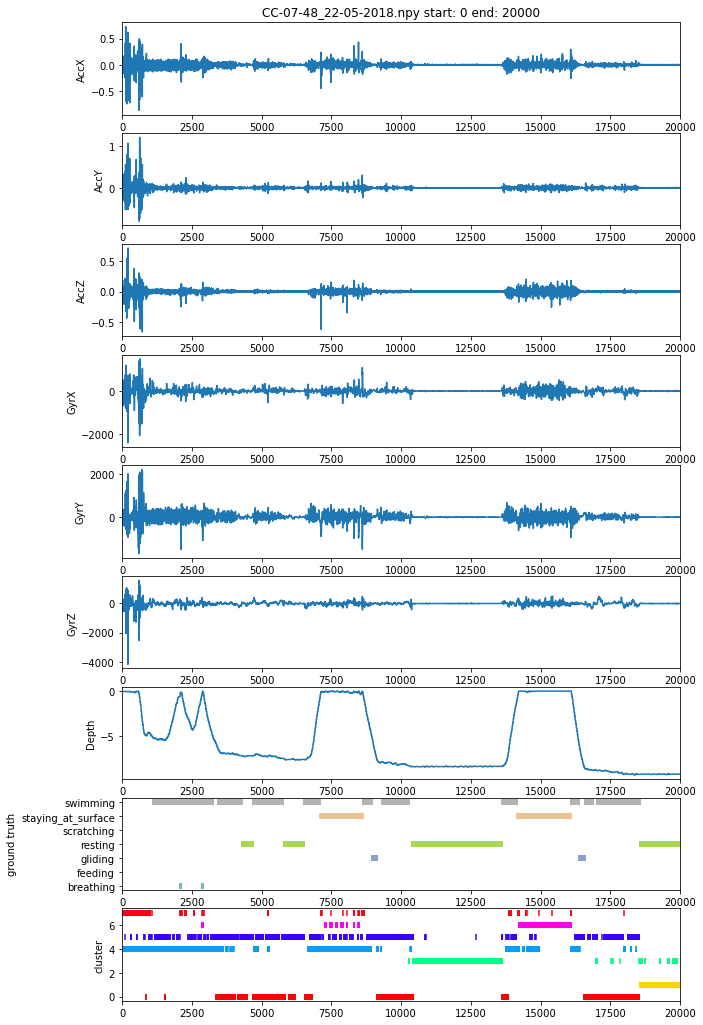

In [44]:
plt.close()
plot_track(input_fp, predictions_fp, config)

In [6]:

fps = glob.glob('/home/jupyter/behavior_data_local/data/formatted/ladds_seals/clip_data/*.npy')

In [9]:
for fp in fps:
    data = np.load(fp)
    if np.isnan(data).any():
        print(fp)

/home/jupyter/behavior_data_local/data/formatted/ladds_seals/clip_data/ronnie-11-09-14.npy


In [11]:
data = np.load('/home/jupyter/behavior_data_local/data/formatted/ladds_seals/clip_data/ronnie-11-09-14.npy')

In [12]:
for i in range(np.shape(data)[1]):
    if np.isnan(data[:,i]).any():
        print(i)

3


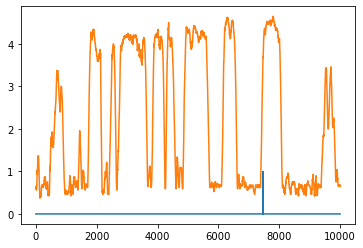

In [20]:
start = 30000
end = 40000

plt.plot(np.isnan(data[start:end, 3]))
plt.plot(data[start: end, 3])

In [21]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [30]:
y= np.array([1, 1, 1, np.nan, np.nan, 2, 2, np.nan, -1, -3])

In [31]:
y

array([ 1.,  1.,  1., nan, nan,  2.,  2., nan, -1., -3.])

In [32]:
nans, x= nan_helper(y)
y[nans]= np.interp(x(nans), x(~nans), y[~nans])

In [33]:
y

array([ 1.        ,  1.        ,  1.        ,  1.33333333,  1.66666667,
        2.        ,  2.        ,  0.5       , -1.        , -3.        ])